In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import cv2
import extcolors
import PIL
from colormap import rgb2hex
from PIL import Image
from PIL import ImageOps
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
%matplotlib inline
from gpx_converter import Converter


Exception: The file your_input.csv does not exist.

In [4]:
crop_img = cv2.imread('resize_mapa_crop_2_col.png')
crop_img = crop_img[:,:,1]

In [389]:
img = cv2.imread('mapa.png').astype(np.float32)
#img = img[:,:,0]
#img[:,:,1] = 0
#img[:,:,2] = 0

In [390]:
step_x = 0.02075020408
step_y = 0.01327343705

In [391]:
san = (22.877448, 49.004879)
hel = (18.810408, 54.592996)

In [392]:
hel_pix = (272, 36)
san_pix = (468, 457)

(13.166352490560001, 55.07083973185)

In [395]:
('lon', 'lat')

('lon', 'lat')

In [396]:
img.shape

(471, 605, 3)

In [397]:
lat = np.zeros(shape = img.shape[:2]).astype(np.float32)
lon = np.zeros(shape = img.shape[:2]).astype(np.float32)

In [402]:
lon[:,0] = start[0]
lon[0,:] = start[0]
for i in range(1, img.shape[1]):
    lon[:,i] = lon[:,i-1] + step_x
lat[0,:] = start[1]
for i in range(1, img.shape[0]):
    lat[i,:] = lat[i-1,:] + step_y

In [404]:
img[:,:,1] = lat
img[:,:,2] = lon

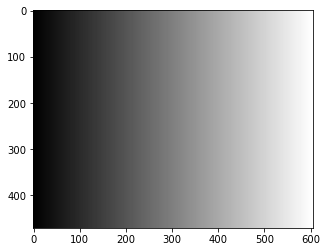

In [408]:
plt.imshow(img[:,:,2], cmap = 'gray')

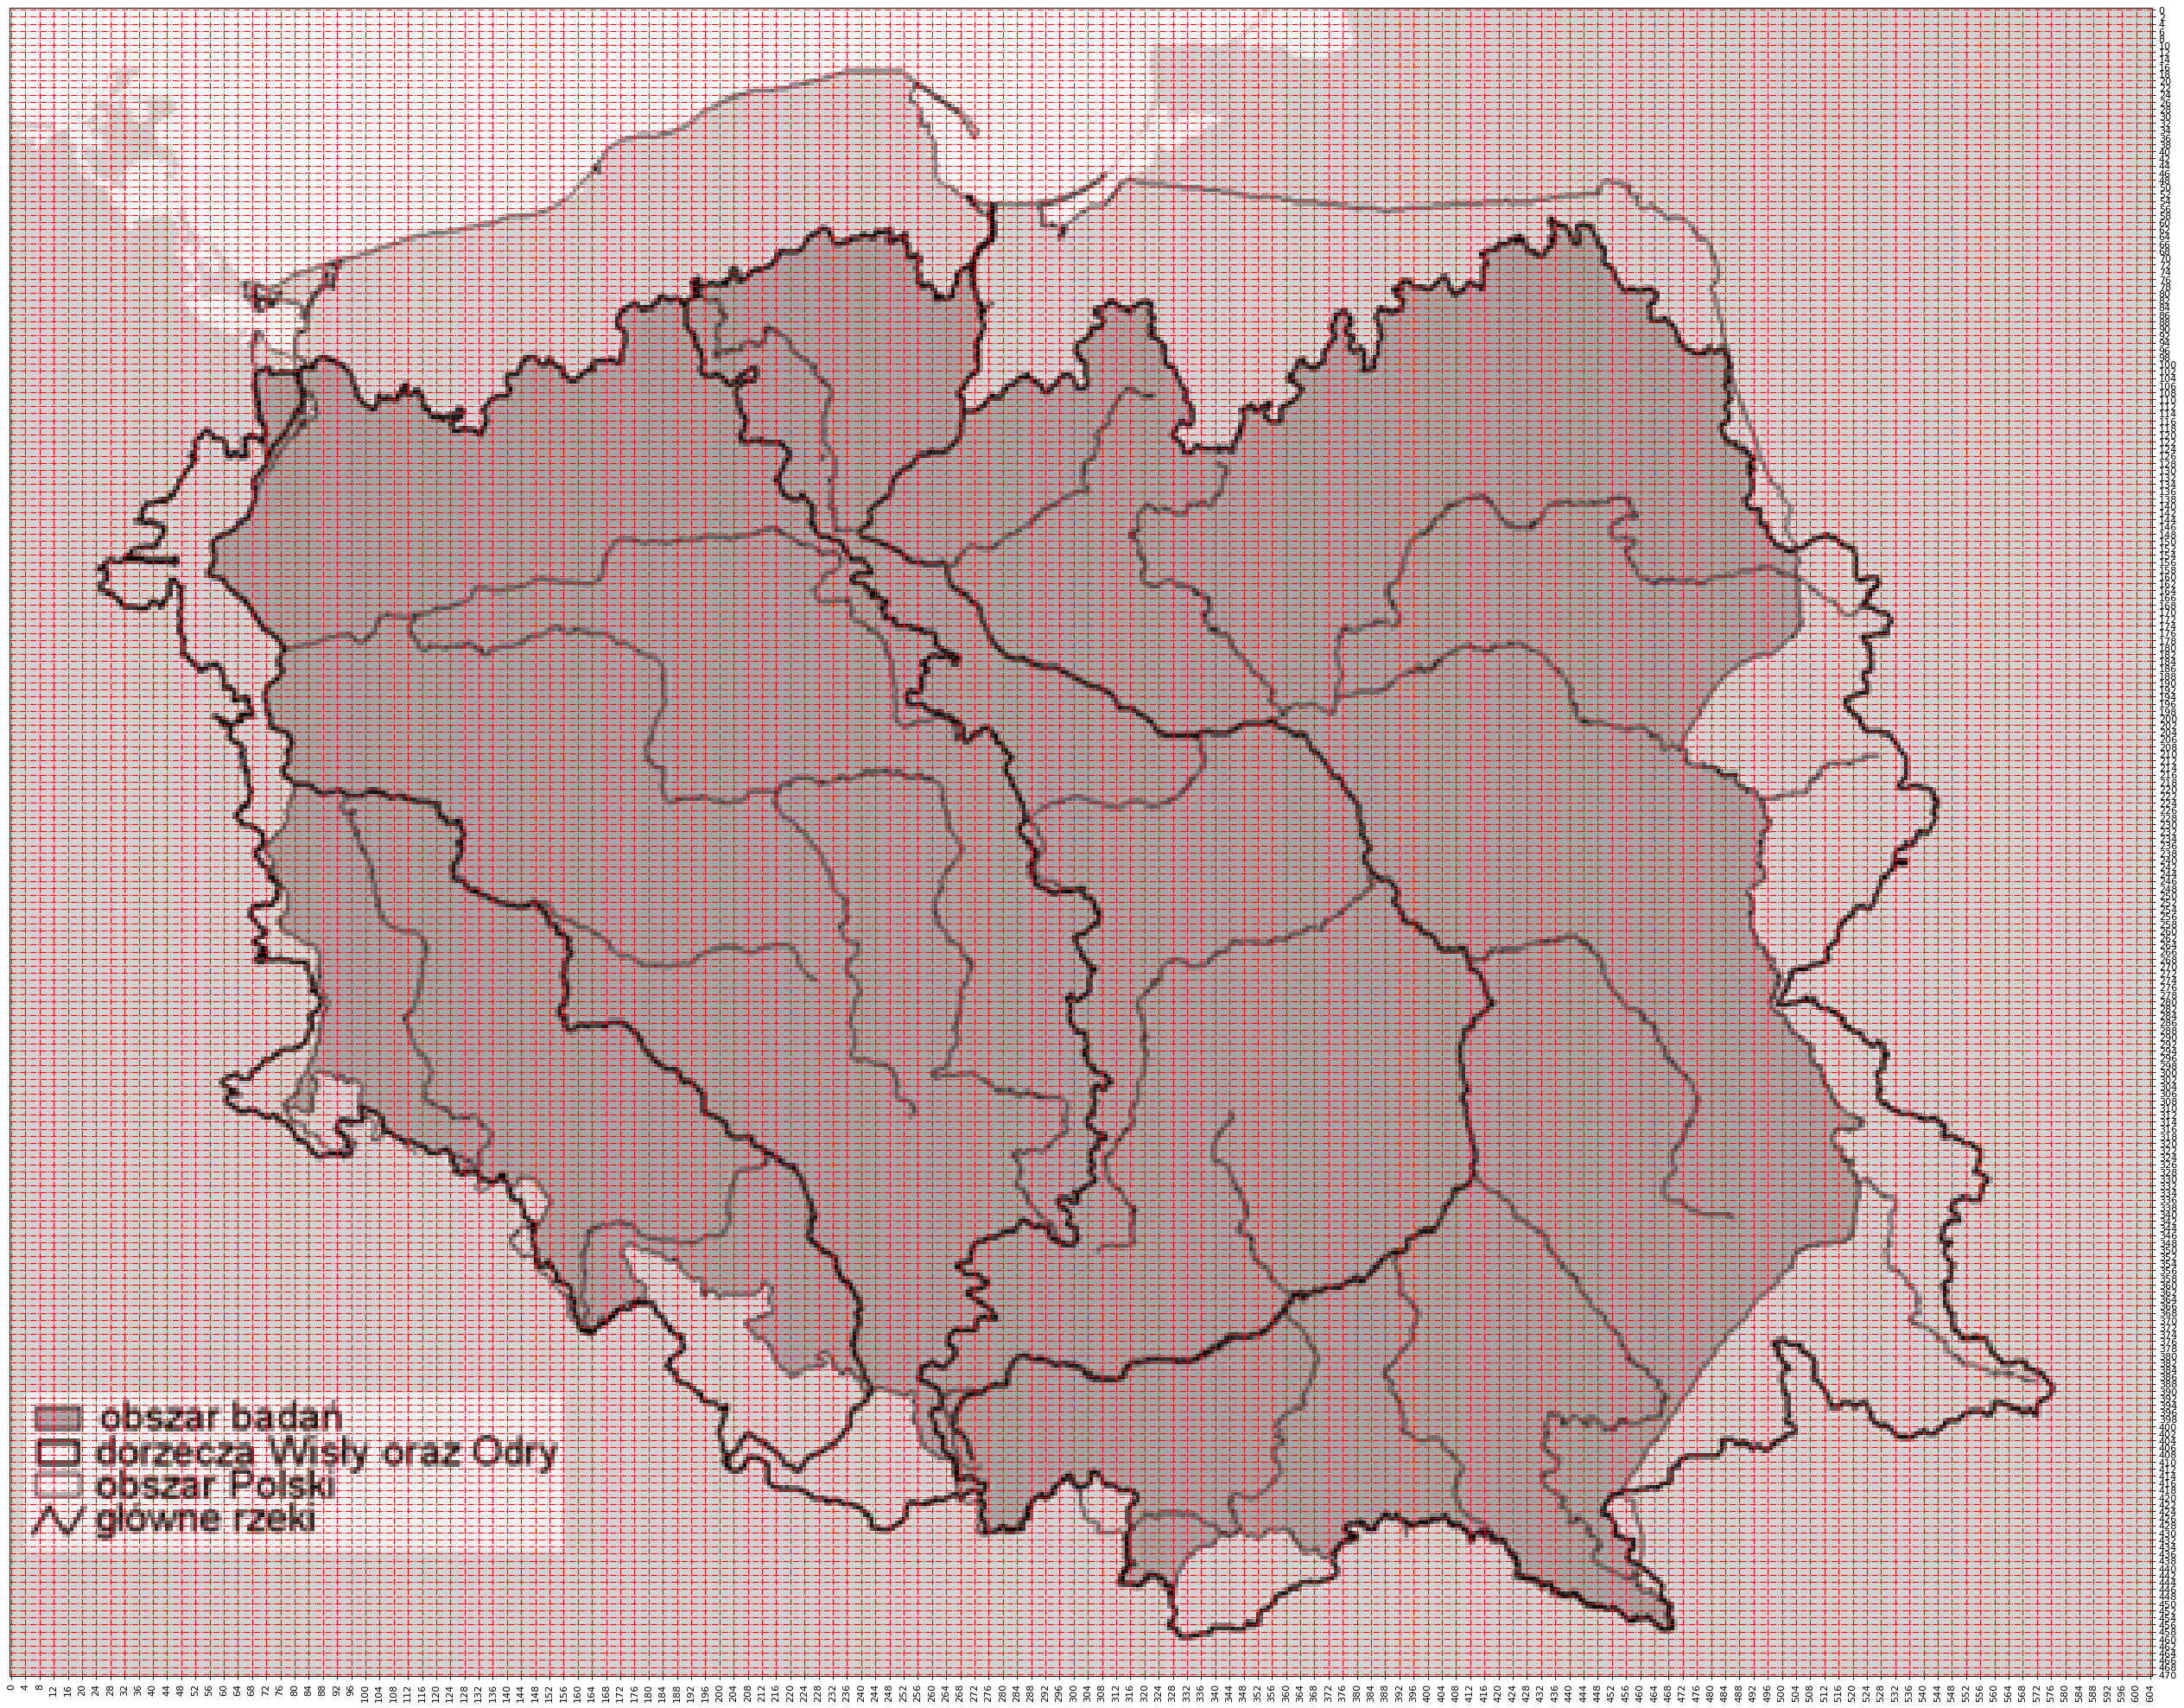

In [20]:
img = img[:,:,1]
plt.figure(figsize=(40, 40), dpi=80)
plt.imshow(img, cmap = 'gray')
ax = plt.gca()
ax.set_xticks(np.arange(0,img.shape[1],2))
#ax.xaxis.tick_top()
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_xticks(ax.get_xticks()[::2])
ax.set_yticks(np.arange(0,img.shape[0],2))
ax.yaxis.tick_right()
ax.grid(color='red', linestyle='-.', linewidth=1)
#plt.show()
plt.savefig('foo.png')

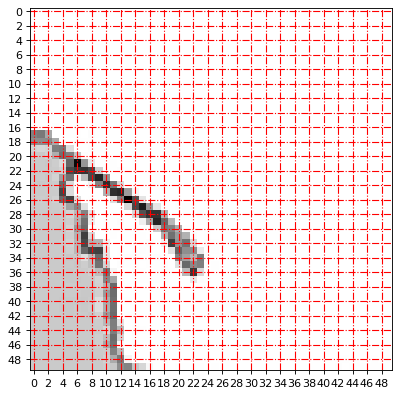

In [324]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
plt.imshow(img[:50, 250:300], cmap = 'gray')
ax = plt.gca()
ax.set_xticks(np.arange(0,50,2))
ax.set_yticks(np.arange(0,50,2))
ax.grid(color='red', linestyle='-.', linewidth=1)


In [288]:
limg.shape

(471, 605)

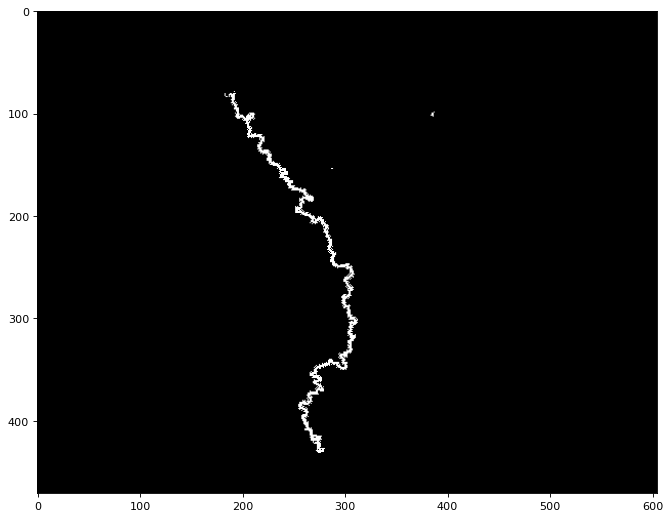

In [350]:
from matplotlib.pyplot import figure
limg = cv2.imread('linia_white.png')
limg = limg[:,:,0]
limg = limg.astype('uint8')
limg = np.where(limg == 255, 0, 255)
figure(figsize=(10,10), dpi=80)
plt.imshow(limg, cmap = 'gray')

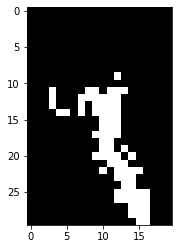

In [351]:
plt.imshow(limg[70:100,180:200], cmap = 'gray')

In [352]:
start = (85,182)

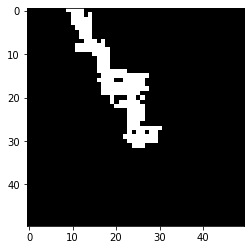

In [353]:
plt.imshow(limg[400:450,250:300], cmap = 'gray')

In [354]:
end = (430,275)

In [355]:
limg[430,275]

255

In [356]:
df = pd.DataFrame(arr)

In [357]:
import tcod
graph = tcod.path.CustomGraph(limg.shape)
CARDINAL = [
     [1, 1, 1, 1, 1],
     [1, 1, 0, 1, 1],
     [1, 1, 1, 1,  1],]

In [358]:
graph.add_edges(edge_map=CARDINAL, cost=limg)
pf = tcod.path.Pathfinder(graph)
pf.add_root(start)
pf.resolve()
pf.distance

path = pf.path_to(end)

In [359]:
len(path)

364

In [329]:
new_arr = np.ones(shape = limg.shape)*255

In [330]:
new_arr[[path[:,0]],path[:,1]] = 0

In [325]:
np.where(limg == 0, 255, 0)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

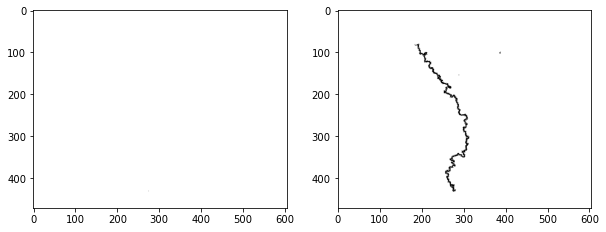

In [436]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches((10,10))
axes[0].imshow(new_arr, cmap = 'gray')
axes[1].imshow(np.where(limg == 0, 255, 0), cmap = 'gray')
plt.show()

In [472]:
start = san[0]- step_x*san_pix[0], san[1] + step_y*san_pix[1]

In [473]:
start

(13.166352490560001, 55.07083973185)

In [474]:
longitude = start[0] + path[:,1]*step_x
latitude = start[1] - path[:,0]*step_y
dct = {'latitude':latitude, 'longitude':longitude}
pd.DataFrame(dct).to_csv('vol_1.csv', index = False)
Converter(input_file='vol_1.csv').csv_to_gpx(lats_colname='latitude',
                                                 longs_colname='longitude',
                                                 output_file='vol_1.gpx')

In [477]:
dct = {'latitude':latitude, 'longitude':longitude}

True